# 原始数据

## 1依赖库


In [82]:
import numpy as np

In [83]:
import matplotlib.pyplot as plt

In [84]:
import pandas as pd

## 1.型断裂韧性原始数据

In [85]:
Gic={"0day":0.2176,"14day":0.2393,"70day":0.2787,"140day":0.2858,"210day":0.2971,"280day":0.3175}

In [86]:
Gic=pd.Series(Gic)

In [87]:
Gic=sorted(Gic)

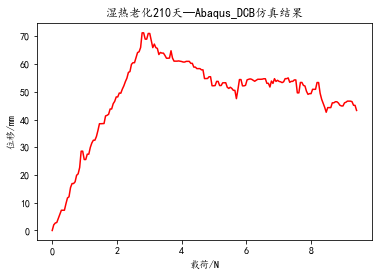

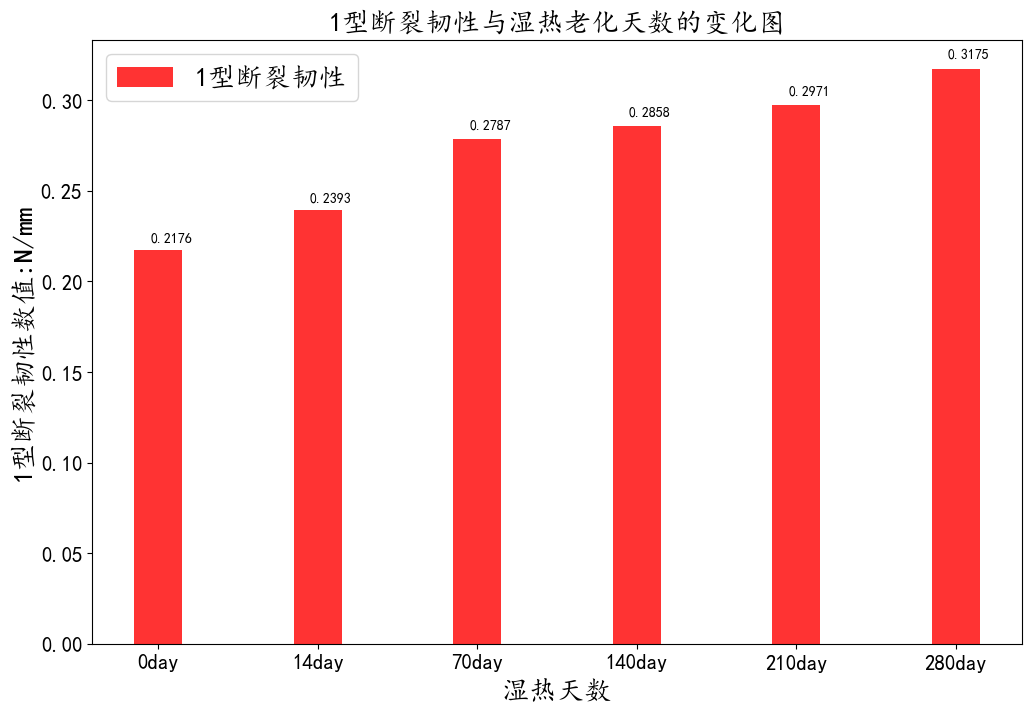

In [88]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['kaiti'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(12,8),dpi=100)
day=range(0,len(Gic))
day=[i for i in day]
rect=plt.bar(day,Gic,color='r',width = .3,alpha=0.8,label='1型断裂韧性')
for rec in rect:
    x=rec.get_x()
    height=rec.get_height()
    plt.text(x+0.1,1.02*height,str(height))
plt.xlabel('湿热天数',fontsize=20)
plt.ylabel('1型断裂韧性数值:N/mm',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("1型断裂韧性与湿热老化天数的变化图",fontsize=20)
plt.legend(loc='upper left',fontsize=20)
plt.xticks(range(0,6),['0day','14day','70day','140day','210day','280day'])
plt.show()

## 2.原始数据拟合

In [89]:
target=np.polyfit([0,14,70,140,210,280],Gic,2)

In [90]:
p1=np.poly1d(target)
y_vals=p1([0,14,70,140,210,280])
print(p1)

            2
-1.058e-06 x + 0.0005984 x + 0.2274


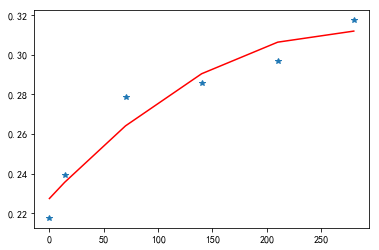

In [91]:
li_plot1=plt.plot([0,14,70,140,210,280], Gic, '*',label='original values')
li_plot2=plt.plot([0,14,70,140,210,280], y_vals, 'r',label='polyfit values')
plt.show()

# II型原始数据处理

In [92]:
import collections
Giic=collections.OrderedDict()
Giic['0day']=0.90412
Giic['14day']=0.70890
Giic['70day']=0.71215
Giic['140day']=0.59735
Giic['210day']=0.57035
Giic['280day']=0.55456


In [93]:
list(Giic.values())

[0.90412, 0.7089, 0.71215, 0.59735, 0.57035, 0.55456]

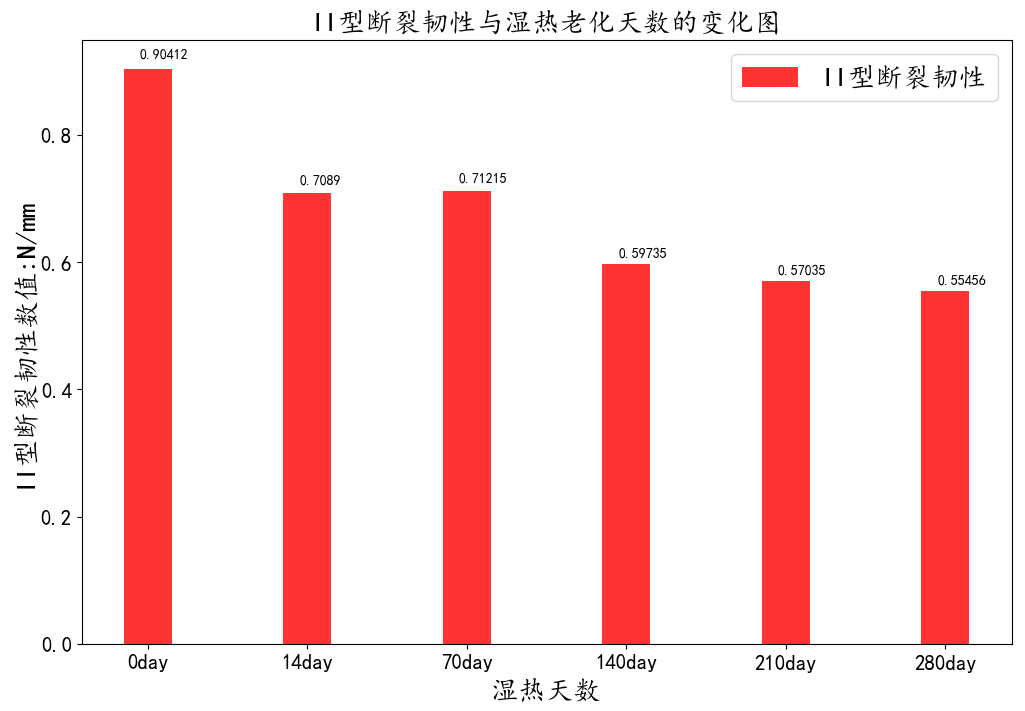

In [94]:
plt.figure(figsize=(12,8),dpi=100)
day=range(0,len(Giic))
day=[i for i in day]
rect=plt.bar(day,Giic.values(),color='r',width = .3,alpha=0.8,label='II型断裂韧性')
for rec in rect:
    x=rec.get_x()
    height=rec.get_height()
    plt.text(x+0.1,1.02*height,str(height))
plt.xlabel('湿热天数',fontsize=20)
plt.ylabel('II型断裂韧性数值:N/mm',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("II型断裂韧性与湿热老化天数的变化图",fontsize=20)
plt.legend(loc='upper right',fontsize=20)
plt.xticks(range(0,6),['0day','14day','70day','140day','210day','280day'])
plt.show()

In [95]:
target=np.polyfit([0,14,70,140,210,280],list(Giic.values()),2)

In [96]:
p1=np.poly1d(target)
y_vals=p1([0,14,70,140,210,280])
print(p1)

           2
4.766e-06 x - 0.002301 x + 0.8315


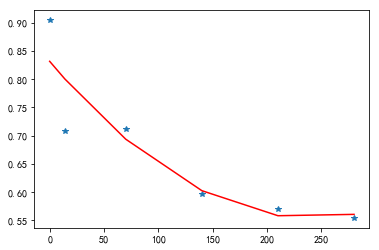

In [97]:
li_plot1=plt.plot([0,14,70,140,210,280], list(Giic.values()), '*',label='original values')
li_plot2=plt.plot([0,14,70,140,210,280], y_vals, 'r',label='polyfit values')
plt.show()

# I型与II型数据对比

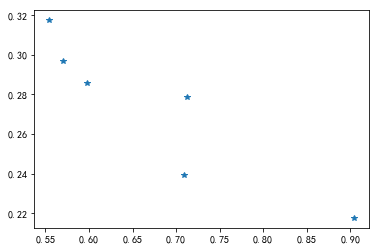

In [98]:
Gic
Giic=list(Giic.values())
plt.plot(Giic,Gic,"*")
plt.show()

In [99]:
Gic_Giic=np.polyfit(Gic,Giic,1)

In [100]:
p1=np.poly1d(Gic_Giic)
y_vals=p1(Gic)
print(p1)

 
-3.232 x + 1.556


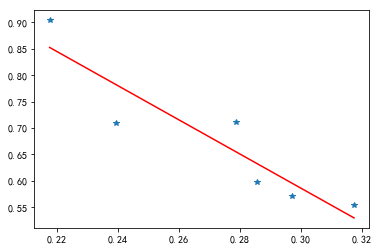

In [101]:
Gic_Giic_plot1=plt.plot(Gic,Giic, '*',label='original values')
Gic_Giic_plot2=plt.plot(Gic, y_vals, 'r',label='polyfit values')
plt.show()

# 3. DCB-Abaqus仿真结果

## 3.1 Cohesive自定义子程序输入参数：

In [102]:
cd E:/Bi_ye/DCB仿真数据处理_线性/

E:\Bi_ye\DCB仿真数据处理_线性


In [103]:
Data_Handle=pd.read_table("Linear_DCB.csv",encoding="gbk",sep=",")

In [104]:
Data_Handle

,湿热老化天数,Gic(N/mm),Giic(N/mm),S(层间剪切强度/Mpa),T(拉伸强度/Mpa)(未知)
0,0,0.2176,0.90412,75.63,30
1,14,0.2393,0.70890,84.98,30
2,70,0.2787,0.71215,67.21,30
3,140,0.2858,0.59735,64.73,30
4,210,0.2971,0.57035,62.36,30
5,280,0.3175,0.55456,62.14,30


## 3.2 CFPR材料参数

- CFPR材料参数获得依据T700碳纤维的力学性能参数以及TDE86的力学性能参数，参考层合板理论获得

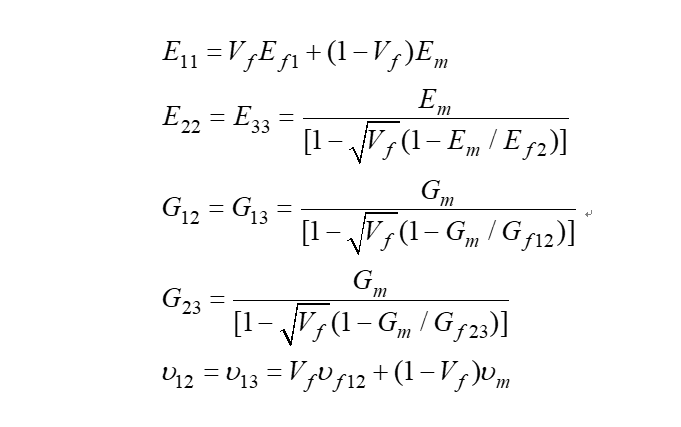

In [105]:
from IPython.core.display import Image, display
display(Image('123.png', width=800,height=600,unconfined=True,))

In [106]:
Data_Handle=pd.read_table("Linear_CFPR.csv",encoding="gbk",sep=",")

In [107]:
Data_Handle

,E11(Mpa),E22(Mpa),E33(Mpa),G12(Mpa),G13(Mpa),G23(Mpa),v12,v13,v23
0,139380,8548.9,8548.9,4648.4,4648.4,3115.3,0.308,0.308,0.37207


## 3.3 DCB_Abaqus数据处理

### 3.3.1 老化湿热时间0天----载荷-位移曲线

In [108]:
Day_0=pd.read_csv("linear_0day.csv",header=None)

In [109]:
import matplotlib.pylab as pylab

In [110]:
import os

In [111]:
plt.figure(figsize=(10,6),dpi=100)
plt.subplot(2,2,1)
plt.plot(Day_0[3],Day_0[1])
plt.xlabel("载荷/N")
plt.ylabel("位移/mm")
plt.title("湿热老化0天—Abaqus_DCB仿真结果")
plt.subplot(2,2,2)
import scipy.signal as signal
Data_fliter=signal.medfilt(Day_0[1])
Day_0[1]=Data_fliter
plt.plot(Day_0[3],Data_fliter,'r')
plt.xlabel("载荷/N")
plt.ylabel("位移/mm")
plt.title("噪声处理-湿热老化0天—Abaqus_DCB仿真结果")
plt.savefig("D:/0_1day.png")
plt.subplot(2,1,2)
os.chdir("E:/Bi_ye/1型层间断裂韧性原始数据/1型层间断裂韧性原始数据/")
data=pd.read_csv("1xing-2-2.csv",encoding="gbk",skiprows=3,header=None,dtype=float)
del data[4],data[5]
data=data[data[2]>0]
if max(data[3])>40:
    plt.ylabel("载荷/N")
    plt.xlabel("位移/mm")
    plt.title("湿热老化0天--试验和仿真对比结果")
    plt.plot(data[2],data[3],"black",label="试验")
    plt.plot(Day_0[3],Data_fliter,'r',label="仿真")
    plt.legend()
    plt.grid()
plt.savefig("D:/0_day.png")

### 3.3.2老化湿热时间14天----载荷-位移曲线

In [112]:
cd E:/Bi_ye/DCB仿真数据处理_线性/

E:\Bi_ye\DCB仿真数据处理_线性


In [113]:
Day_0=pd.read_csv("linear_14day.csv",header=None)

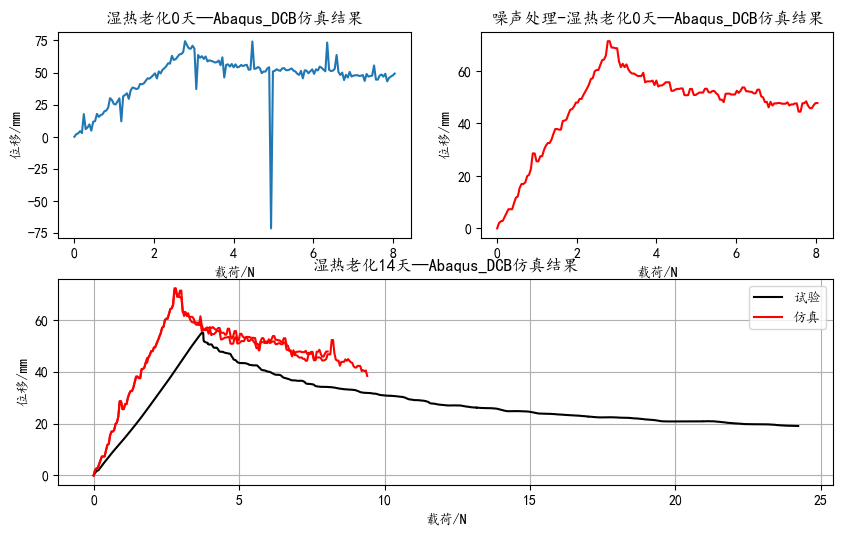

In [114]:
"""
plt.figure(figsize=(10,6),dpi=100)
plt.subplot(2,2,1)
plt.plot(Day_0[3],Day_0[1])
plt.xlabel("载荷/N")
plt.ylabel("位移/mm")
plt.title("湿热老化14天—Abaqus_DCB仿真结果")
plt.subplot(2,2,2)
"""
import scipy.signal as signal
Data_fliter=signal.medfilt(Day_0[1])
plt.plot(Day_0[3],Data_fliter,'r')
plt.xlabel("载荷/N")
plt.ylabel("位移/mm")
plt.title("湿热老化14天—Abaqus_DCB仿真结果")
"""
plt.subplot(2,1,2)
os.chdir("E:/Bi_ye/1型层间断裂韧性原始数据/1型层间断裂韧性原始数据/")
data=pd.read_csv("1xing-11-2.csv",encoding="gbk",skiprows=3,header=None,dtype=float)
del data[4],data[5]
data=data[data[2]>0]
if max(data[3])>40:
    plt.ylabel("载荷/N")
    plt.xlabel("位移/mm")
    plt.title("湿热老化14天--试验和仿真对比结果")
    plt.plot(data[2],data[3],"black",label="试验")
    plt.plot(Day_0[3],Data_fliter,'r',label="仿真")
    plt.legend()
    plt.grid()
"""
plt.show()

### 3.3.3 老化湿热时间140天----载荷-位移曲线

In [115]:
cd E:/Bi_ye/DCB仿真数据处理_线性/

E:\Bi_ye\DCB仿真数据处理_线性


In [116]:
Day_0=pd.read_csv("linear_140day.csv",header=None)

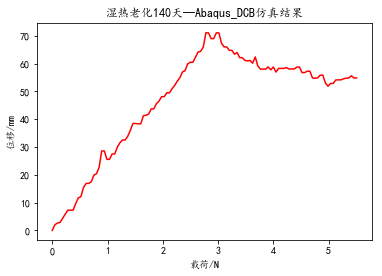

In [117]:
"""
plt.figure(figsize=(10,6),dpi=100)
plt.subplot(2,2,1)
plt.plot(Day_0[3],Day_0[1])
plt.xlabel("载荷/N")
plt.ylabel("位移/mm")
plt.title("湿热老化140天—Abaqus_DCB仿真结果")
plt.subplot(2,2,2)
"""
import scipy.signal as signal
Data_fliter=signal.medfilt(Day_0[1])
plt.plot(Day_0[3],Data_fliter,'r')
plt.xlabel("载荷/N")
plt.ylabel("位移/mm")
plt.title("湿热老化140天—Abaqus_DCB仿真结果")
"""
plt.subplot(2,1,2)
os.chdir("E:/Bi_ye/1型层间断裂韧性原始数据/1型层间断裂韧性原始数据/")
data=pd.read_csv("1xing-20-2.csv",encoding="gbk",skiprows=3,header=None,dtype=float)
del data[4],data[5]
data=data[data[2]>0]
if max(data[3])>40:
    plt.ylabel("载荷/N")
    plt.xlabel("位移/mm")
    plt.title("湿热老化140天--试验和仿真对比结果")
    plt.plot(data[2],data[3],"black",label="试验")
    plt.plot(Day_0[3],Data_fliter,'r',label="仿真")
    plt.legend()
    plt.grid()
"""
plt.show()

### 3.3.4 老化湿热时间210天----载荷-位移曲线

In [118]:
cd E:/Bi_ye/DCB仿真数据处理_线性/

E:\Bi_ye\DCB仿真数据处理_线性


In [119]:
Day_0=pd.read_csv("linaer_210day.CSV",header=None)

In [120]:
"""
plt.figure(figsize=(10,6),dpi=100)
plt.subplot(2,2,1)
plt.plot(Day_0[3],Day_0[1])
plt.xlabel("载荷/N")
plt.ylabel("位移/mm")
plt.title("湿热老化210天—Abaqus_DCB仿真结果")
plt.subplot(2,2,2)
"""
import scipy.signal as signal
Data_fliter=signal.medfilt(Day_0[1])
plt.plot(Day_0[3],Data_fliter,'r')
plt.xlabel("载荷/N")
plt.ylabel("位移/mm")
plt.title("湿热老化210天—Abaqus_DCB仿真结果")
"""
plt.subplot(2,1,2)
os.chdir("E:/Bi_ye/1型层间断裂韧性原始数据/1型层间断裂韧性原始数据/")
data=pd.read_csv("1xing-20-2.csv",encoding="gbk",skiprows=3,header=None,dtype=float)
del data[4],data[5]
data=data[data[2]>0]
if max(data[3])>40:
    plt.ylabel("载荷/N")
    plt.xlabel("位移/mm")
    plt.title("湿热老化210天--试验和仿真对比结果")
    plt.plot(data[2],data[3],"black",label="试验")
    plt.plot(Day_0[3],Data_fliter,'r',label="仿真")
    plt.legend()
    plt.grid()
"""
plt.savefig("210day.png")

# 4 试验和仿真结果比较